<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-02-15 19:51:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  64.1MB/s    in 3.1s    

2025-02-15 19:51:35 (64.1 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [12]:
!pip install pandas

In [13]:
!pip install matplotlib

In [14]:
!pip install seaborn

In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#### Connect to the SQLite database


In [16]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [15]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


CompTotal    0
dtype: int64


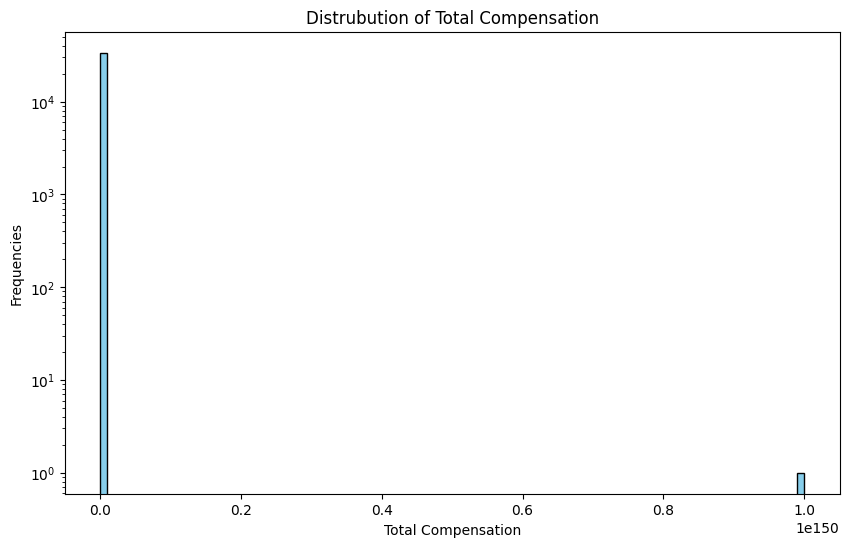

In [36]:
## Write your code here
QUERY = """
SELECT CompTotal 
FROM main 
"""
df_CompTotal = pd.read_sql_query(QUERY, conn)
df_CompTotal = df_CompTotal.dropna()
print(df_CompTotal.isna().sum())

plt.figure(figsize=(10,6))
plt.hist(df_CompTotal, bins=100, edgecolor='black', color='skyblue')
plt.title("Distrubution of Total Compensation")
plt.xlabel("Total Compensation")
plt.ylabel("Frequencies")

plt.yscale('log')
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


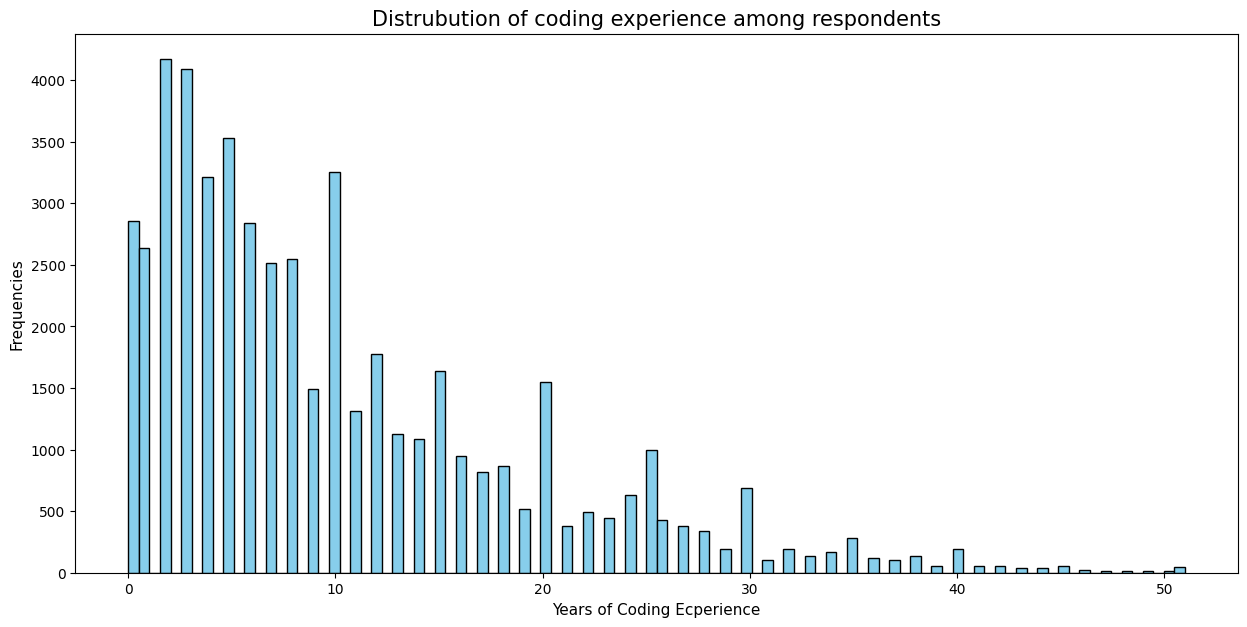

In [25]:
## Write your code here
QUERY = """
SELECT YearsCodePro 
FROM main 
"""
df_YearsCodePro = pd.read_sql_query(QUERY, conn)
df_YearsCodePro = df_YearsCodePro.dropna()
def convert_YearsCodePro(years):
    years = str(years)
    if years == 'Less than 1 year':
        re
        turn 0
    elif years == 'More than 50 years':
        return 51
    else:
        return int(years)
df_YearsCodePro['YearsCodePro_numeric'] = df_YearsCodePro['YearsCodePro'].apply(convert_YearsCodePro)

plt.figure(figsize=(15,7))
plt.hist(df_YearsCodePro['YearsCodePro_numeric'], bins=100, edgecolor='black', color='skyblue')
plt.title("Distrubution of coding experience among respondents", fontsize=15)
plt.xlabel("Years of Coding Ecperience", fontsize=11)
plt.ylabel("Frequencies", fontsize=11)

plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


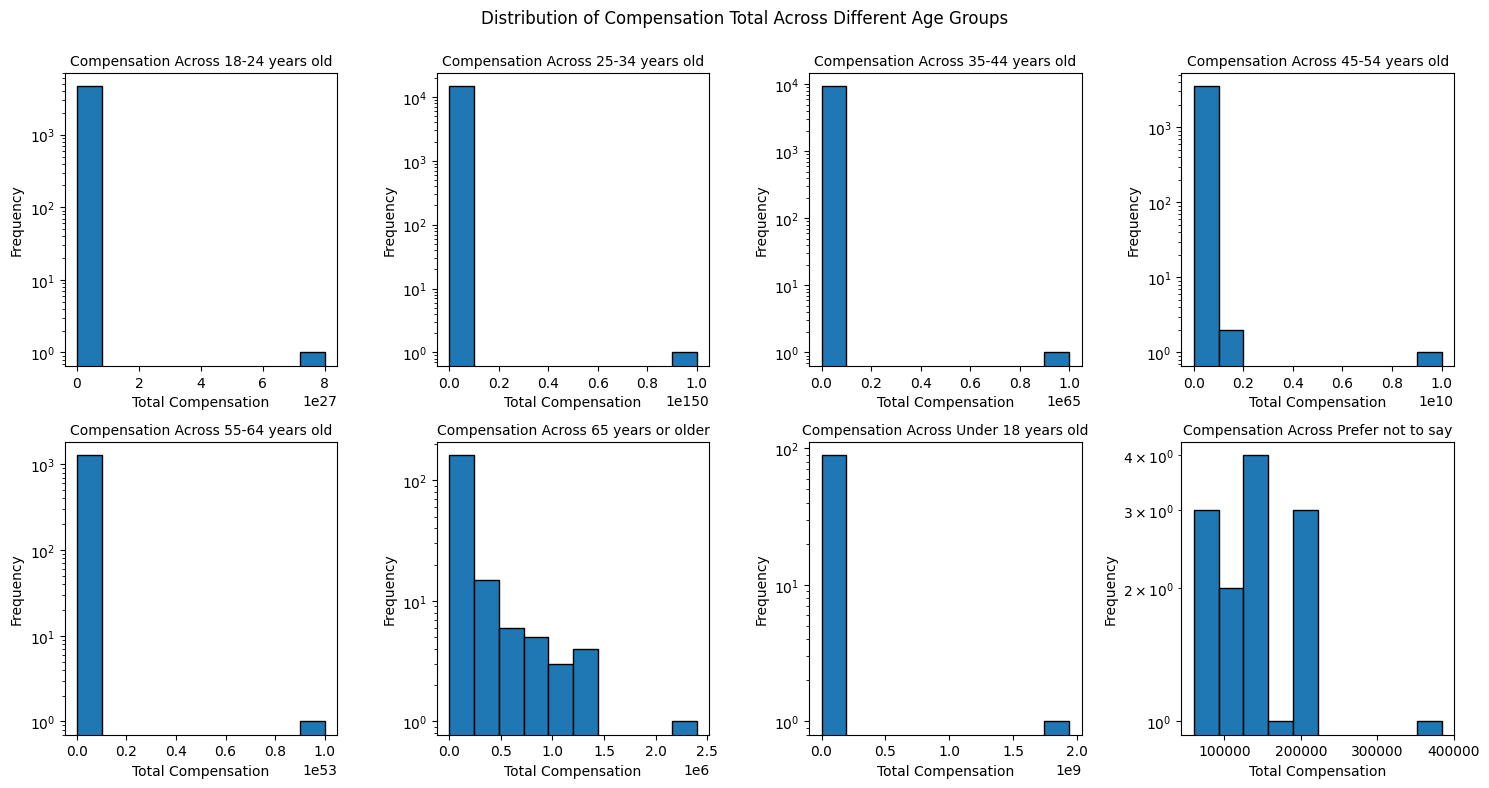

In [43]:
## Write your code here
QUERY = """SELECT Age, CompTotal 
            FROM main 
        """
df = pd.read_sql_query(QUERY, conn).dropna()
# Set up the plot
plt.figure(figsize=(15, 8))

# Plot histograms for each age group
age_groups = df['Age'].unique()  # Get unique age groups

for i, age_group in enumerate(age_groups):
    plt.subplot(2,4,i+1)
    data = df[df['Age'] == age_group]
    #print(age_group,data.value_counts())
    plt.hist(data['CompTotal'], bins=10, edgecolor='black')
    plt.title('Compensation Across '+ age_group, fontsize=10)
    plt.xlabel('Total Compensation', fontsize=10)
    plt.ylabel('Frequency')
    plt.yscale('log')

plt.suptitle('Distribution of Compensation Total Across Different Age Groups')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

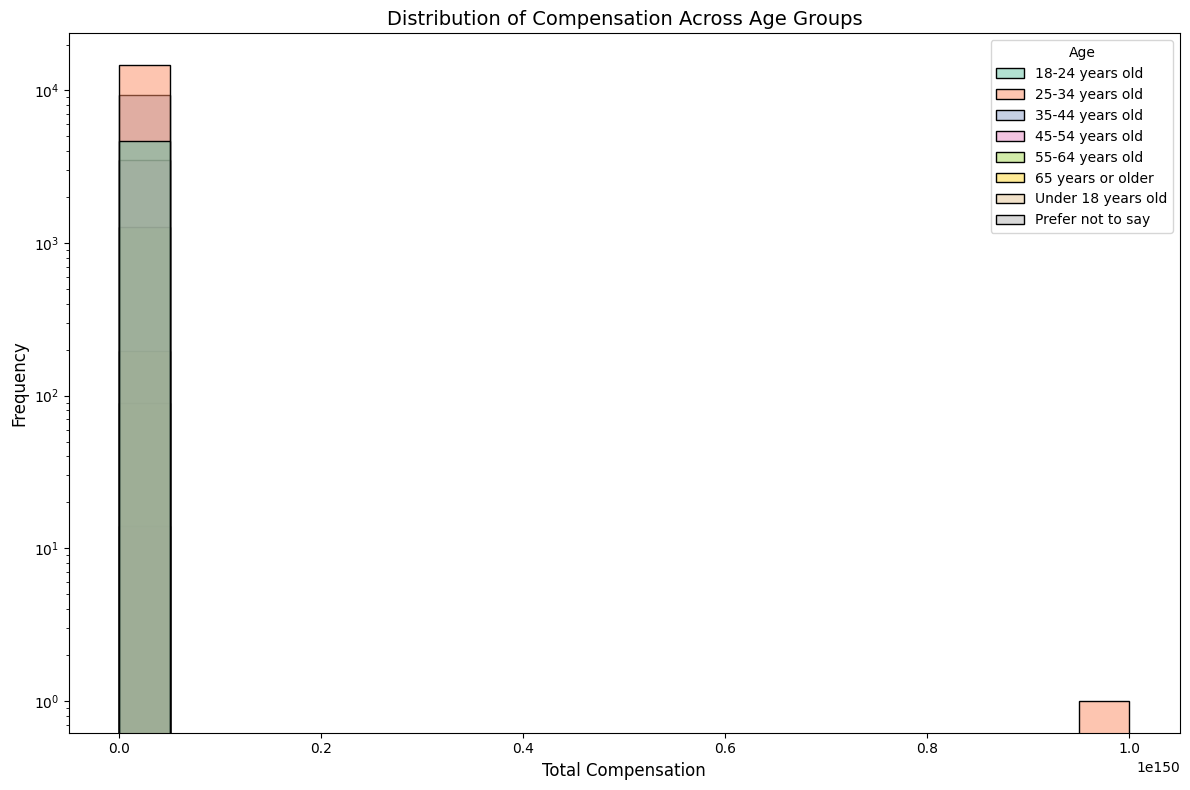

In [49]:
plt.figure(figsize=(12, 8))

# Create a seaborn histogram with a separate plot for each Age group
sns.histplot(data=df, x=df['CompTotal'], hue=df['Age'], kde=False, bins=20, palette='Set2')

# Add labels and title
plt.xlabel('Total Compensation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Compensation Across Age Groups', fontsize=14)
plt.yscale('log')
plt.tight_layout()
plt.show()

In [52]:
df['TimeSearching'].unique()

array(['30-60 minutes a day', '60-120 minutes a day',
       '15-30 minutes a day', 'Less than 15 minutes a day',
       'Over 120 minutes a day'], dtype=object)

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


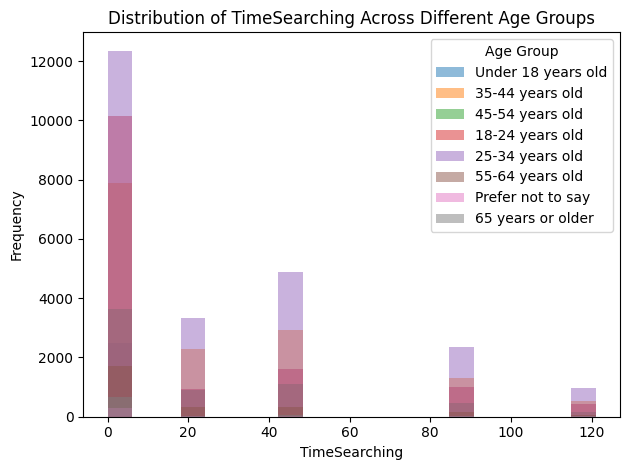

In [78]:
## Write your code here
QUERY =  """SELECT 
            CASE WHEN TimeSearching LIKE '%Over%' THEN 121
            WHEN TimeSearching LIKE '%-%' THEN 
            (cast(substr(TimeSearching, 1, instr(TimeSearching, '-')-1) as integer) + cast(substr(TimeSearching, instr(TimeSearching, '-')+1) as integer)) / 2
            else 0
            end as TimeSearching_int,
            Age
            FROM main 
        """
df = pd.read_sql_query(QUERY, conn).dropna()

# Plot histograms for each age group
age_groups = df['Age'].unique()  # Get unique age groups

for age_group in age_groups:
    # Filter data for the current age group
    data = df[df['Age'] == age_group]['TimeSearching_int']
    #print(age_group,data.value_counts())
    plt.hist(data, bins=20, alpha=0.5, label=age_group)

plt.title('Distribution of TimeSearching Across Different Age Groups')
plt.xlabel('TimeSearching')
plt.ylabel('Frequency')

plt.legend(title='Age Group')

plt.tight_layout()
plt.show()

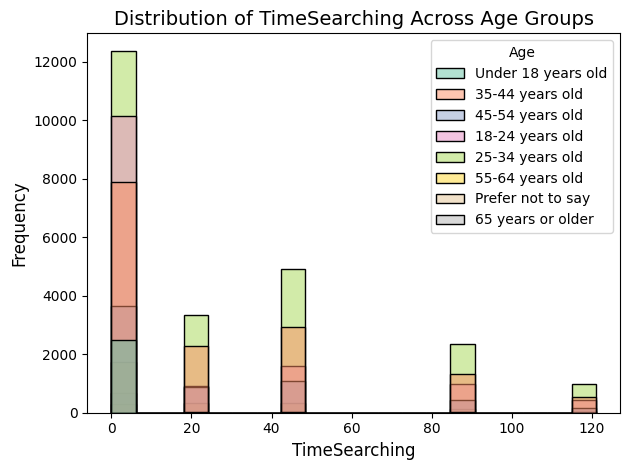

In [76]:

# Create a seaborn histogram with a separate plot for each Age group
sns.histplot(data=df, x=df['TimeSearching_int'], hue=df['Age'], kde=False, bins=20, palette='Set2')

# Add labels and title
plt.xlabel('TimeSearching', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of TimeSearching Across Age Groups', fontsize=14)
#plt.yscale('log')
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


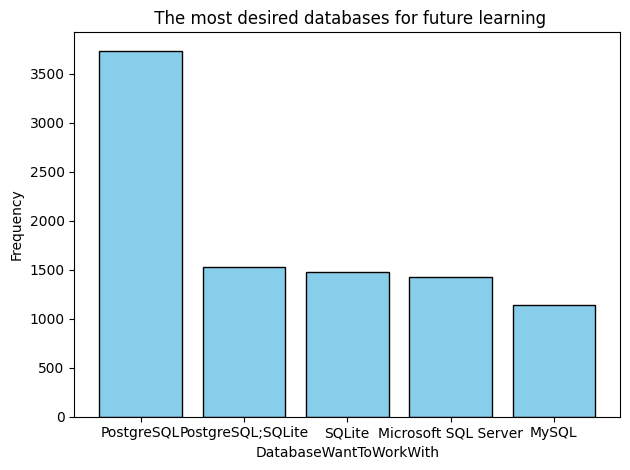

In [33]:
## Write your code here
QUERY = """ SELECT DatabaseWantToWorkWith, COUNT() as Count
            FROM main
            WHERE DatabaseWantToWorkWith IS NOT NULL
            GROUP BY DatabaseWantToWorkWith
            ORDER BY Count DESC
            LIMIT 5"""
df = pd.read_sql_query(QUERY, conn)

plt.bar(df['DatabaseWantToWorkWith'], df['Count'], palette='viridis')

plt.title(' The most desired databases for future learning')
plt.xlabel('DatabaseWantToWorkWith')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


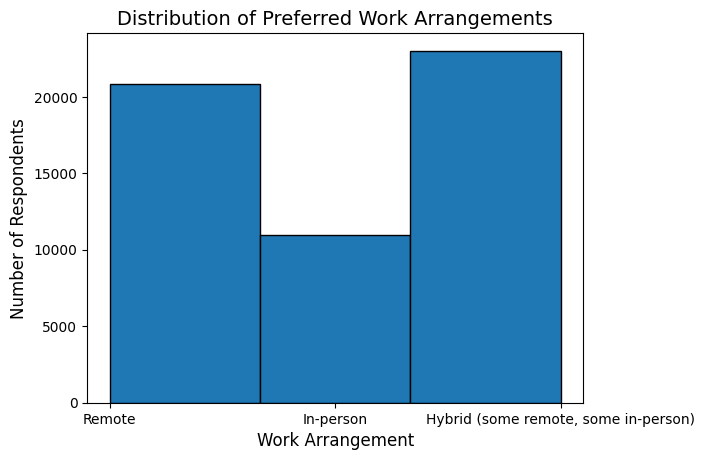

In [45]:
## Write your code here
QUERY = """ SELECT RemoteWork
            FROM main"""
df = pd.read_sql_query(QUERY, conn).dropna()
plt.hist(df['RemoteWork'], bins=len(df['RemoteWork'].unique()), edgecolor='black')
plt.xlabel('Work Arrangement', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.title('Distribution of Preferred Work Arrangements', fontsize=14)

plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


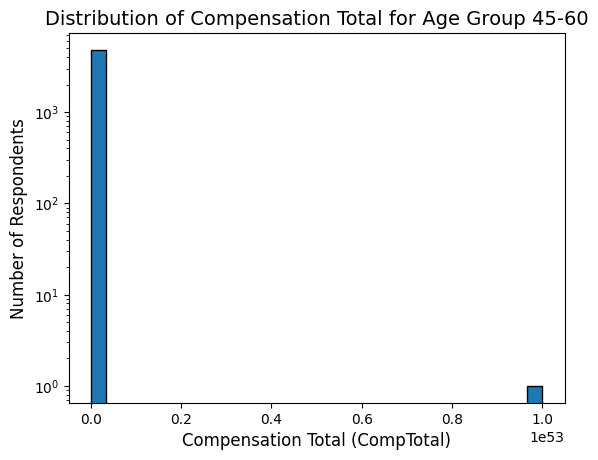

In [52]:
## Write your code here
QUERY = """SELECT CompTotal
           FROM main
           WHERE Age IN ('45-54 years old', '55-64 years old')
           """
df = pd.read_sql_query(QUERY,conn).dropna()

plt.hist(df['CompTotal'], bins=30, edgecolor='black')
plt.xlabel('Compensation Total (CompTotal)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.title('Distribution of Compensation Total for Age Group 45-60', fontsize=14)
plt.yscale('log')
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


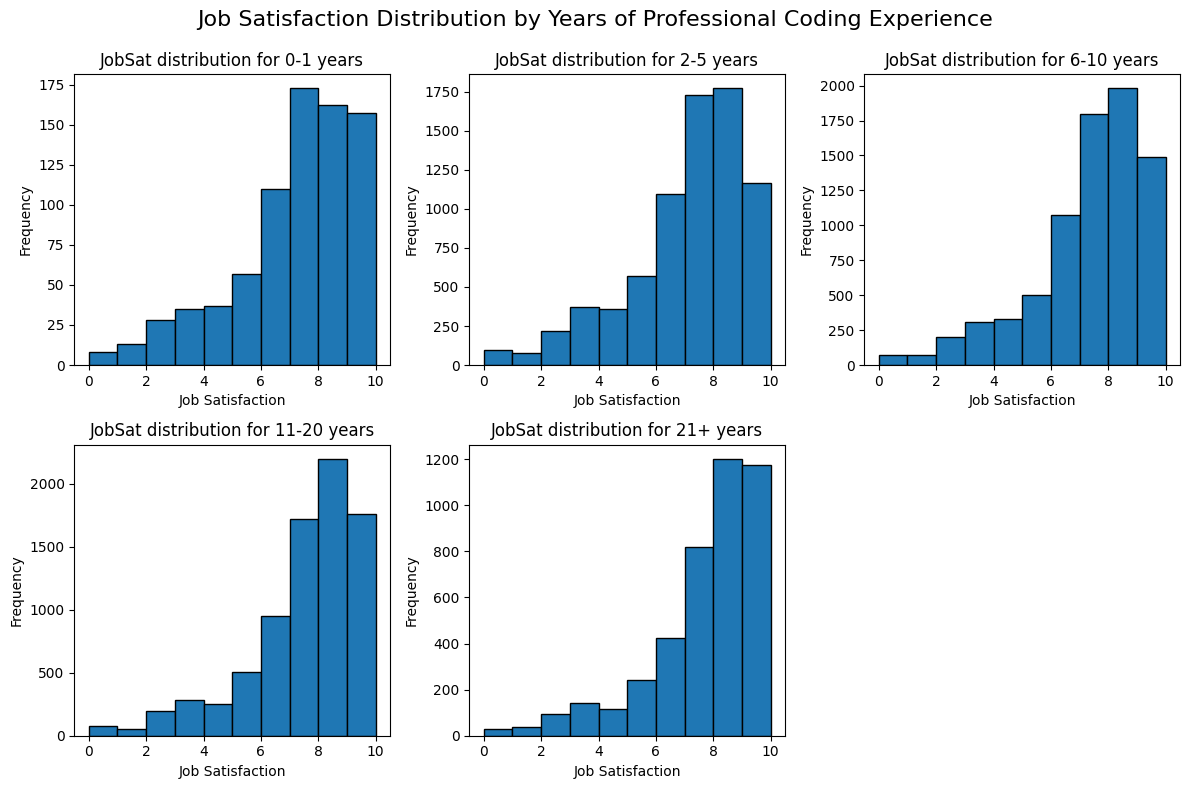

In [45]:
## Write your code here
query = """
        SELECT JobSat, 
        CASE WHEN YearsCodePro LIKE '%Less%' THEN 0
             WHEN YearsCodePro LIKE '%More%' THEN 51
             ELSE YearsCodePro
             END as YearsCodePro
        FROM main
        WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL;
        """

# Load the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

df = df.dropna(subset=['YearsCodePro', 'JobSat'])

bins = [0, 1, 5, 10, 20, 50]  # Define the bins for years of experience
labels = ['0-1 years', '2-5 years', '6-10 years', '11-20 years', '21+ years']
df['ExperienceGroup'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 8))
for i, label in enumerate(labels):
    plt.subplot(2,3,i+1)
    subset = df[df['ExperienceGroup']==label]
    plt.hist(subset['JobSat'], bins=10, edgecolor='black')
    plt.title('JobSat distribution for ' + label)
    plt.xlabel('Job Satisfaction')
    plt.ylabel('Frequency')

plt.suptitle('Job Satisfaction Distribution by Years of Professional Coding Experience', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

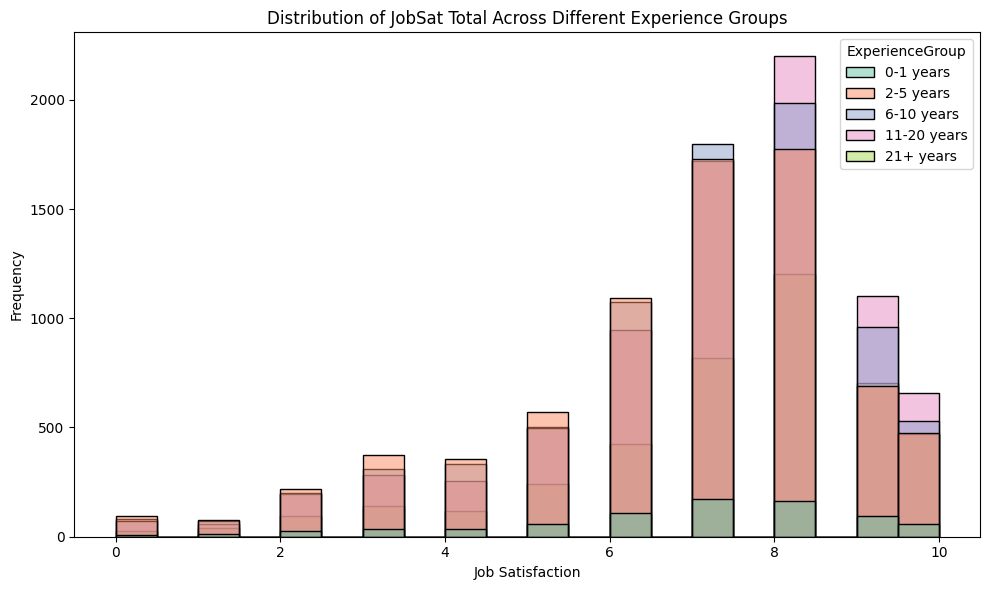

In [62]:
plt.figure(figsize=(10, 6))
df = df.dropna()
sns.histplot(data=df, x='JobSat', hue='ExperienceGroup', kde=False, bins=20, palette='Set2', legend=True)
plt.title('Distribution of JobSat Total Across Different Experience Groups')
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
